In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 97% 593M/612M [00:01<00:00, 306MB/s]
100% 612M/612M [00:01<00:00, 411MB/s]


In [ ]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
!ls

gtsrb-german-traffic-sign.zip  meta  Meta.csv	  test	Test.csv  Train
kaggle.json		       Meta  sample_data  Test	train	  Train.csv


In [ ]:
!rm -rf train test Meta meta sample_data

In [ ]:
!ls

gtsrb-german-traffic-sign.zip  Meta.csv  Test.csv  Train.csv
kaggle.json		       Test	 Train


import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

parameters

In [ ]:
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 64
EPOCHS = 10
NUM_CLASSES = 43

data generators

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'Train',
    target_size=(48, 48),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=[str(i) for i in range(43)],
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'Train',
    target_size=(48, 48),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=[str(i) for i in range(43)],
    subset='validation'
)

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [ ]:
train_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '10': 10,
 '11': 11,
 '12': 12,
 '13': 13,
 '14': 14,
 '15': 15,
 '16': 16,
 '17': 17,
 '18': 18,
 '19': 19,
 '20': 20,
 '21': 21,
 '22': 22,
 '23': 23,
 '24': 24,
 '25': 25,
 '26': 26,
 '27': 27,
 '28': 28,
 '29': 29,
 '30': 30,
 '31': 31,
 '32': 32,
 '33': 33,
 '34': 34,
 '35': 35,
 '36': 36,
 '37': 37,
 '38': 38,
 '39': 39,
 '40': 40,
 '41': 41,
 '42': 42}

CNN model

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48,48,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

compile model

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 628,843 (2.40 MB)

 Trainable params: 628,843 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

train model

In [ ]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 146s 291ms/step - accuracy: 0.3231 - loss: 2.4921 - val_accuracy: 0.8276 - val_loss: 0.5971
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 140s 284ms/step - accuracy: 0.8850 - loss: 0.3785 - val_accuracy: 0.8794 - val_loss: 0.4336
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 138s 281ms/step - accuracy: 0.9513 - loss: 0.1622 - val_accuracy: 0.9221 - val_loss: 0.2779
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 137s 280ms/step - accuracy: 0.9664 - loss: 0.1101 - val_accuracy: 0.9347 - val_loss: 0.2529
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 143s 292ms/step - accuracy: 0.9744 - loss: 0.0770 - val_accuracy: 0.9347 - val_loss: 0.2612
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 132s 268ms/step - accuracy: 0.9786 - loss: 0.0669 - val_accuracy: 0.9439 - val_loss: 0.2376
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 132s 268ms/step - accuracy: 0.9852 - loss: 0.0465 - val_accuracy: 0.9473 - val_loss: 0.2322
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 133s 270ms/step - accuracy: 0.9876 - loss: 0.04

Plot Accuracy & Loss

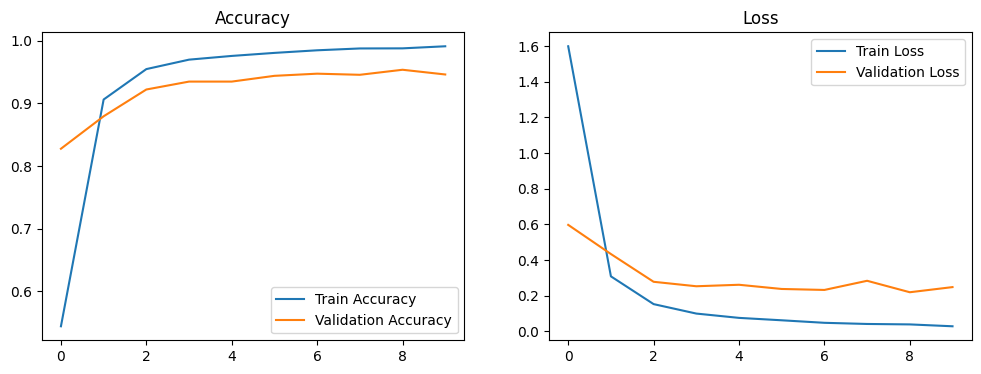

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

testing

In [ ]:
test_df = pd.read_csv('Test.csv')
test_df.head()
from tensorflow.keras.preprocessing import image

X_test = []
y_test = []

for i in range(len(test_df)):
    img_path = os.path.join(test_df['Path'][i])
    img = image.load_img(img_path, target_size=(48, 48))
    img = image.img_to_array(img)
    img = img / 255.0
    X_test.append(img)
    y_test.append(test_df['ClassId'][i])

X_test = np.array(X_test)
y_test = np.array(y_test)
y_test_cat = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=2)
print("Test Accuracy:", test_acc)

395/395 - 13s - 32ms/step - accuracy: 0.9644 - loss: 0.1575
Test Accuracy: 0.9644497036933899


395/395 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step


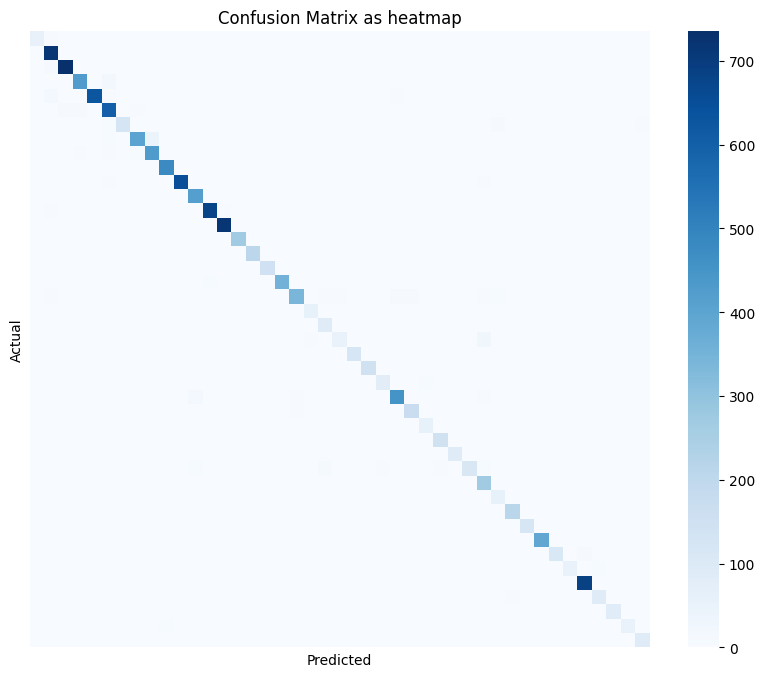

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='Blues', xticklabels=False, yticklabels=False)
plt.title("Confusion Matrix as heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        60
           1       0.95      0.99      0.97       720
           2       0.98      0.98      0.98       750
           3       0.96      0.95      0.95       450
           4       1.00      0.95      0.97       660
           5       0.93      0.95      0.94       630
           6       1.00      0.85      0.92       150
           7       0.97      0.90      0.93       450
           8       0.90      0.95      0.93       450
           9       0.99      1.00      0.99       480
          10       1.00      0.98      0.99       660
          11       0.95      1.00      0.97       420
          12       0.98      0.98      0.98       690
          13       0.99      1.00      0.99       720
          14       0.99      1.00      0.99       270
          15       0.98      1.00      0.99       210
          16       1.00      1.00      1.00       150
          17       1.00    

example of testing traffic sign

In [ ]:
meta = pd.read_csv('Meta.csv')
class_names = meta['ClassId'].values
from google.colab import files
uploaded = files.upload()

Saving ts9.jpg to ts9 (1).jpg


preprocess

In [ ]:
img_path = list(uploaded.keys())[0]

img = tf.keras.preprocessing.image.load_img(
    img_path, target_size=(48, 48)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

predict

In [ ]:
prediction = model.predict(img_array)
confidence = np.max(prediction)

print("Predicted Class ID:", predicted_class)
print("Confidence:", confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted Class ID: 14
Confidence: 0.99998593


display

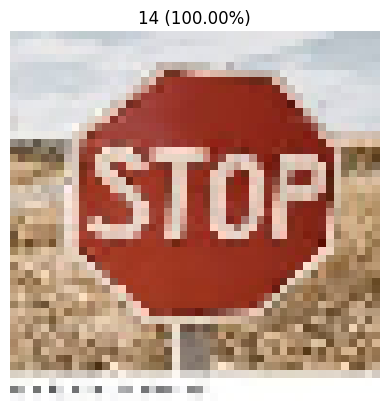

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.title(f"{predicted_class} ({confidence*100:.2f}%)")
plt.show()

In [ ]:
model.save('traffic_sign_cnn.keras')
